<div class='alert' style='background-color: #1c1a1e; color: #f5f4f0; padding:16px 26px; border-radius:20px; font-size:40px;'><B>GP Patient Survey</b> - First Notebook </div>
<div style='margin:0px 26px; color:#1c1a1e; font-size:16px;'>
<ol>
<li><B>Notebook Documentation</B>: Documenting a Jupyter Notebook is crucial for ensuring that the analysis it contains is understandable and reproducible, not only by others but also by your future self.  
Best practices in documentation start with a clear, informative introduction: what the notebook aims to achieve, the dataset being used, and any prerequisite knowledge or context needed to follow the analysis.  
Each cell, especially those containing key computations or decisions, should be accompanied by Markdown cells explaining the rationale behind the code, any assumptions made, and a summary of the results. Inline comments within the code cells can clarify complex lines of code or non-obvious steps.  
Visualizations should include titles, axis labels, and legends where appropriate to make them self-explanatory. Finally, the notebook should conclude with a summary of findings, any conclusions drawn, and possible next steps. This narrative structure turns your notebook from a mere collection of code cells into a coherent story about your data analysis journey.
</ol>
</div>

# Libraries & Data

In [1]:
# Importing default Libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
import datetime 
import os 

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

# Hi-resolution Plots and Matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Set the maximum number of rows and columns to be displayed
warnings.filterwarnings('ignore')

# "magic commands" to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2

## Loading Data

In [2]:
from gp_patient_survey.params import *
from gp_patient_survey.utils import *
from gp_patient_survey.data import *

In [32]:
raw_data = load_google_sheet()

[🏁] FUCTION: load_google_sheet()
[✔️] Completed: load_google_sheet() - Time taken: 2.35 seconds


In [33]:
raw_data.head(2)

,time,surgery,phone,appointment_time,making_appointment,overall_experience,website,free_text
0,2024-02-22 12:00:42,Earls Court Surgery,Very easy,Very satisfied,Very good,Very good,Very good,
1,2024-02-22 12:01:16,Emperor's Gate Health Centre,Very easy,Very satisfied,Very good,Very good,Very good,


In [34]:
raw_data.isna().sum()

time                  0
surgery               0
phone                 0
appointment_time      0
making_appointment    0
overall_experience    0
website               0
free_text             0
dtype: int64

# MAP DATA

In [35]:
def convert_phone_responses(df, column_name):
    # Define the mapping from string responses to numeric values
    mapping = {
        'Very easy': 4,
        'Fairly easy': 3,
        'Not very easy': 2,
        'Not at all easy': 1
    }
    # Apply the mapping to the specified column
    df[column_name] = df[column_name].map(mapping)
    return df

In [36]:
def convert_appointment_time(df, column_name):
    # Define the mapping from string responses to numeric values
    mapping2 = {
        'Very satisfied' : 5,
        'Fairly satisfied': 4,
        'Neither satisfied nor dissatisfied': 3,
        'Fairly dissatisfied': 2,
        'Very dissatisfied': 1
    }
    # Apply the mapping to the specified column
    df[column_name] = df[column_name].map(mapping2)
    return df

In [37]:
def convert_other(df, column_name):
    # Define the mapping from string responses to numeric values
    mapping3 = {
        'Very good' : 5,
        'Fairly good': 4,
        'Neither good nor poor': 3,
        'Fairly poor': 2,
        'Very poor': 1
    }
    # Apply the mapping to the specified column
    df[column_name] = df[column_name].map(mapping3)
    return df

In [40]:



raw_data

,time,surgery,phone,appointment_time,making_appointment,overall_experience,website,free_text
0,2024-02-22 12:00:42,Earls Court Surgery,Very easy,Very satisfied,Very good,Very good,Very good,
1,2024-02-22 12:01:16,Emperor's Gate Health Centre,Very easy,Very satisfied,Very good,Very good,Very good,
2,2024-02-22 12:01:48,Health Partners at Violet Melchett,Very easy,Very satisfied,Very good,Very good,Very good,
3,2024-02-22 12:02:01,Knightsbridge Medical Centre,Very easy,Very satisfied,Very good,Very good,Very good,
4,2024-02-22 12:02:33,Royal Hospital Chelsea,Very easy,Very satisfied,Very good,Very good,Very good,
5,2024-02-22 12:02:47,Scarsdale Medical Centre,Very easy,Very satisfied,Very good,Very good,Very good,
6,2024-02-22 12:03:00,Stanhope Mews Surgery,Very easy,Very satisfied,Very good,Very good,Very good,
7,2024-02-22 12:03:28,The Abingdon Medical Practice,Very easy,Very satisfied,Very good,Very good,Very good,
8,2024-02-22 12:03:50,The Chelsea Practice,Very easy,Very satisfied,Very good,Very good,Very good,
9,2024-02-22 12:04:03,The Good Practice,Very easy,Very satisfied,Very good,Very good,Very good,


In [39]:
data.columns

Index(['time', 'surgery', 'phone', 'appointment_time', 'making_appointment',
       'overall_experience', 'website', 'free_text', 'row_sum'],
      dtype='object')

In [28]:
def add_row_values(df, columns):
    # Ensure columns are in the DataFrame
    columns_present = [col for col in columns if col in df.columns]
    
    # Calculate the sum of the specified columns row-wise
    df['row_sum'] = df[columns_present].sum(axis=1)
    
    return df

# Columns to sum up
columns_to_sum = ['phone', 'appointment_time', 'making_appointment', 'overall_experience', 'website']

# Apply the function
df_summed = add_row_values(data, columns_to_sum)

# Display the DataFrame with the row sums
df_summed

,time,surgery,phone,appointment_time,making_appointment,overall_experience,website,free_text,row_sum
0,2024-02-22 12:00:42,Earls Court Surgery,4,5,5,5,5,,24
1,2024-02-22 12:01:16,Emperor's Gate Health Centre,4,5,5,5,5,,24
2,2024-02-22 12:01:48,Health Partners at Violet Melchett,4,5,5,5,5,,24
3,2024-02-22 12:02:01,Knightsbridge Medical Centre,4,5,5,5,5,,24
4,2024-02-22 12:02:33,Royal Hospital Chelsea,4,5,5,5,5,,24
5,2024-02-22 12:02:47,Scarsdale Medical Centre,4,5,5,5,5,,24
6,2024-02-22 12:03:00,Stanhope Mews Surgery,4,5,5,5,5,,24
7,2024-02-22 12:03:28,The Abingdon Medical Practice,4,5,5,5,5,,24
8,2024-02-22 12:03:50,The Chelsea Practice,4,5,5,5,5,,24
9,2024-02-22 12:04:03,The Good Practice,4,5,5,5,5,,24


In [29]:
df_summed.columns

Index(['time', 'surgery', 'phone', 'appointment_time', 'making_appointment',
       'overall_experience', 'website', 'free_text', 'row_sum'],
      dtype='object')

<Axes: xlabel='count', ylabel='phone'>

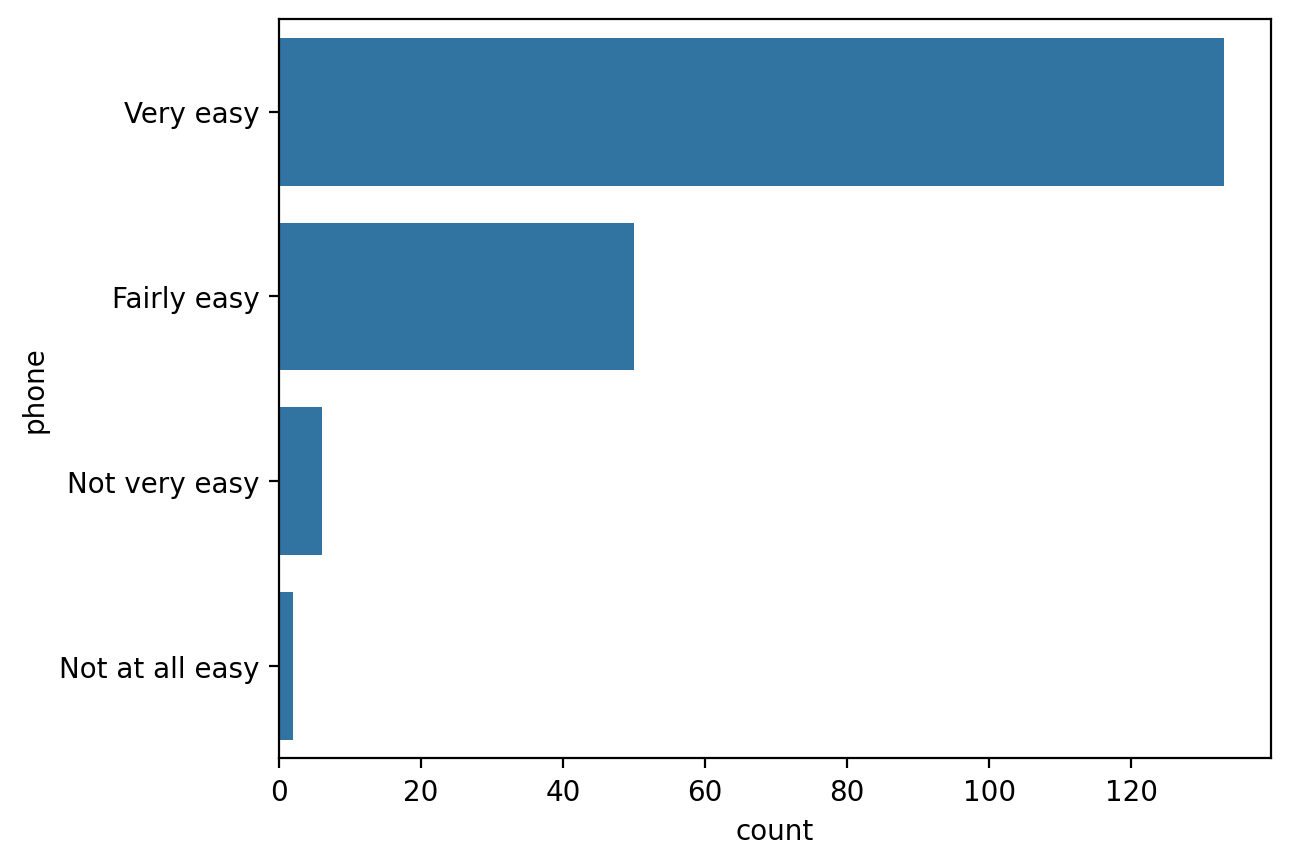

In [41]:
sns.countplot(raw_data['phone'])